# 项目：纽约市Airbnb数据集

## 分析目标

通过对Airbnb房源数据的清洗和整理，识别热门房源特征和区域分布，为房源定价和平台运营提供数据支持。

## 简介

该数据集包含了2019年纽约市的Airbnb上线的房间情况。Airbnb是一个旅行房屋租赁社区，用户可通过网站或手机APP发布、搜索度假房屋租赁信息并在线预定。

## 变量含义

- id：房间id
- name：房间名称
- host_id：房东id
- host_name：房东姓名
- neighbourhood_group：地区
- neighbourhood：街区
- latitude：纬度坐标
- longitude：经度坐标
- room_type：房间类型
- price：价格（美元）
- minimum_nights：最少预定夜晚数
- number_of_reviews：评论数量
- last_review：最新浏览
- reviews_per_month：每月浏览次数
- calculated_host_listings_count：房东挂出房子的数量
- availability_365：可预定房源的天数

### 读取数据

导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件"e_commerce.csv"里的数据内容，解析为DataFrame，并赋值给变量`original_data`。

In [1]:
import pandas as pd

检查表格的大致结构和样貌是什么样

In [2]:
original_data = pd.read_csv("airbnb_NYC_2019.csv")
original_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 评估数据

在这部分，我将对上部分建立的original_data这个DataFrame所包含的数据进行评估。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。

#### 结构型评估

Check List
 - 是否每列是一个变量；
 - 是否每行是一个观察值；
 - 是否每个单元室只有一个值；

获取随机N行来进行检查

In [3]:
original_data.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45029,34498360,Modern One Bedroom in the Hudson Yards,26413356,Charity,Manhattan,Hell's Kitchen,40.75562,-73.99459,Entire home/apt,175,36,0,NaN,NaN,1,0


结论：结构整洁满足要求

#### 内容型评估

Check list
 - 评估丢失数据
 - 评估重复数据
 - 评估不一致数据
 - 评估无效数据
 - 评估错误数据

先用`info`方法检查所有列总行数是否有对不齐的地方

In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

结论：

1. 缺失值：正确总行数是48895行，但其中`name`、`host_name`、`last_review`、`reviews_per_month`这四列变量存在缺失值

2. 格式转换：其中`id`应该是字符串、`host_id`也应该是字符串、`last_review`应该是整数int，应当进行数据格式转换。

##### 评估缺失数据

在了解`name`存在缺失值后，根据条件提取出缺失观察值。

In [5]:
original_data[original_data["name"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


结论：房间没有名字也没关系，`name`这列可以不做处理

在了解`host_name`存在缺失值后，根据条件提取出缺失观察值。

In [6]:
original_data[original_data["host_name"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


结论：房东没有名字也没关系，`host_name`这列可以不做处理

在了解`last_review`存在缺失值后，根据条件提取出缺失观察值。

In [7]:
original_data[original_data["last_review"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


结论：我们的目的是识别热门房源特征和区域分布，为房源定价和平台运营提供数据支持，如果最新浏览数据缺失，可以不用作为分析数据，安排删除

在了解`reviews_per_month`存在缺失值后，根据条件提取出缺失观察值。

In [8]:
original_data[original_data["reviews_per_month"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


结论：与`last_view`的结论相同，对我们的分析没有用，安排删除。

忽然有一个想法想要验证，是不是`last_view`为空的`reviews_per_month`也一定为空呢？

In [9]:
original_data["reviews_per_month"].isnull().sum()

np.int64(10052)

In [10]:
original_data["last_review"].isnull().sum()

np.int64(10052)

##### 评估重复数据

从变量含义来看，`name，host_id，host_name, neighbourhood, neighbourhood_group,` 等都是可以重复的，那么针对此数据集，我们无需评估重复数据。

##### 评估不一致数据

可能会存在于房间类型`room_type`，`neighbourhood`, `neighbourhood_group`，`name`我们可以具体查看是否存在多个不同值指代同一个的情况。

先看看`room_type`是否有同一名字命名不一致的。

In [11]:
original_data["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

结论：不存在，可以进行下一个检查

检查`neighbourhood`是否有不一致问题

In [12]:
original_data["name"].value_counts()

name
Hillside Hotel                                     18
Home away from home                                17
New york Multi-unit building                       16
Brooklyn Apartment                                 12
Loft Suite @ The Box House Hotel                   11
                                                   ..
Charming one bedroom - newly renovated rowhouse     1
Affordable room in Bushwick/East Williamsburg       1
Sunny Studio at Historical Neighborhood             1
43rd St. Time Square-cozy single bed                1
Room for rest                                       1
Name: count, Length: 47905, dtype: int64

结论：名字太多了，但可以加上经纬度来看是否有同样经纬度但名字不同的。

In [13]:
original_data[original_data["latitude"] == original_data["longitude"]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


结论：没有位置重合的房子，可以不用管房间名重复的部分。

##### 异常数据

例如：价格可能出现异常值

### 清洗数据

#### 清洗任务List

1. 删除last_review缺失值；
2. 删除reviews_per_month缺失值
3. 格式转换-id改为字符串
4. 格式转换-host_id也改为字符串
5. 格式转换-last_review改为日期

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [14]:
cleaned_data = original_data.copy()
cleaned_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


1. 删除last_review缺失值；
2. 删除reviews_per_month缺失值

In [15]:
cleaned_data = cleaned_data.dropna(subset=["last_review","reviews_per_month"])

In [16]:
cleaned_data["last_review"].isnull().sum()

np.int64(0)

In [17]:
cleaned_data["reviews_per_month"].isnull().sum()

np.int64(0)

1. 格式转换-id改为字符串
2. 格式转换-host_id也改为字符串
3. 格式转换-last_review改为日期

In [18]:
cleaned_data["last_review"] = pd.to_datetime(cleaned_data["last_review"])
cleaned_data["last_review"]

0       2018-10-19
1       2019-05-21
3       2019-07-05
4       2018-11-19
5       2019-06-22
           ...    
48782   2019-07-07
48790   2019-07-07
48799   2019-07-07
48805   2019-07-07
48852   2019-07-08
Name: last_review, Length: 38843, dtype: datetime64[ns]

In [19]:
cleaned_data["id"]=cleaned_data["id"].astype(str)
cleaned_data["id"]

0            2539
1            2595
3            3831
4            5022
5            5099
           ...   
48782    36425863
48790    36427429
48799    36438336
48805    36442252
48852    36455809
Name: id, Length: 38843, dtype: object

In [20]:
cleaned_data["host_id"]=cleaned_data["host_id"].astype(str)
cleaned_data["host_id"]

0             2787
1             2845
3             4869
4             7192
5             7322
           ...    
48782     83554966
48790    257683179
48799    211644523
48805    273841667
48852     74162901
Name: host_id, Length: 38843, dtype: object

检查Price有没有负数或者=0的，这种也不需要

In [21]:
cleaned_data[(cleaned_data["price"] < 0) | (cleaned_data["price"] == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [22]:
cleaned_data = cleaned_data[cleaned_data["price"] != 0]

In [23]:
# 检查极端的最小住宿天数
print(cleaned_data["minimum_nights"].describe())
# 可能发现1000天这样的异常值，需要过滤

count    38833.000000
mean         5.867561
std         17.386070
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [24]:
# 验证坐标是否在纽约市合理范围内
nyc_lat_range = (40.5, 40.9)
nyc_lon_range = (-74.3, -73.7)
valid_coords = cleaned_data[
    cleaned_data["latitude"].between(*nyc_lat_range) & 
    cleaned_data["longitude"].between(*nyc_lon_range)
]

### 保存数据

In [25]:
cleaned_data.to_csv("airbnb_NYC_2019_cleaned.csv", index=False)

In [26]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38833 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38833 non-null  object        
 1   name                            38827 non-null  object        
 2   host_id                         38833 non-null  object        
 3   host_name                       38817 non-null  object        
 4   neighbourhood_group             38833 non-null  object        
 5   neighbourhood                   38833 non-null  object        
 6   latitude                        38833 non-null  float64       
 7   longitude                       38833 non-null  float64       
 8   room_type                       38833 non-null  object        
 9   price                           38833 non-null  int64         
 10  minimum_nights                  38833 non-null  int64         
 11  number_

In [28]:
## 热门房源特征分析可以关注：
# 1. 价格分段
cleaned_data["price_range"] = pd.cut(cleaned_data["price"], 
                                   bins=[0, 50, 100, 200, 500, 10000],
                                   labels=["经济", "中等", "高端", "豪华", "超豪华"])

# 2. 热度等级
cleaned_data["popularity"] = pd.cut(cleaned_data["reviews_per_month"],
                                  bins=[0, 0.5, 2, 5, 100],
                                  labels=["冷门", "一般", "热门", "爆款"])

In [29]:
# 按区域分析价格和热度
region_analysis = cleaned_data.groupby("neighbourhood_group").agg({
    "price": "mean",
    "reviews_per_month": "mean",
    "id": "count"
}).round(2)

# 数据分析 - Ai写的

C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3654341578.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax4.boxplot(box_data, labels=regions, patch_artist=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3654341578.py:83: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3654341578.py:83: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3654341578.py:83: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3654341578.py:83: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) Dej

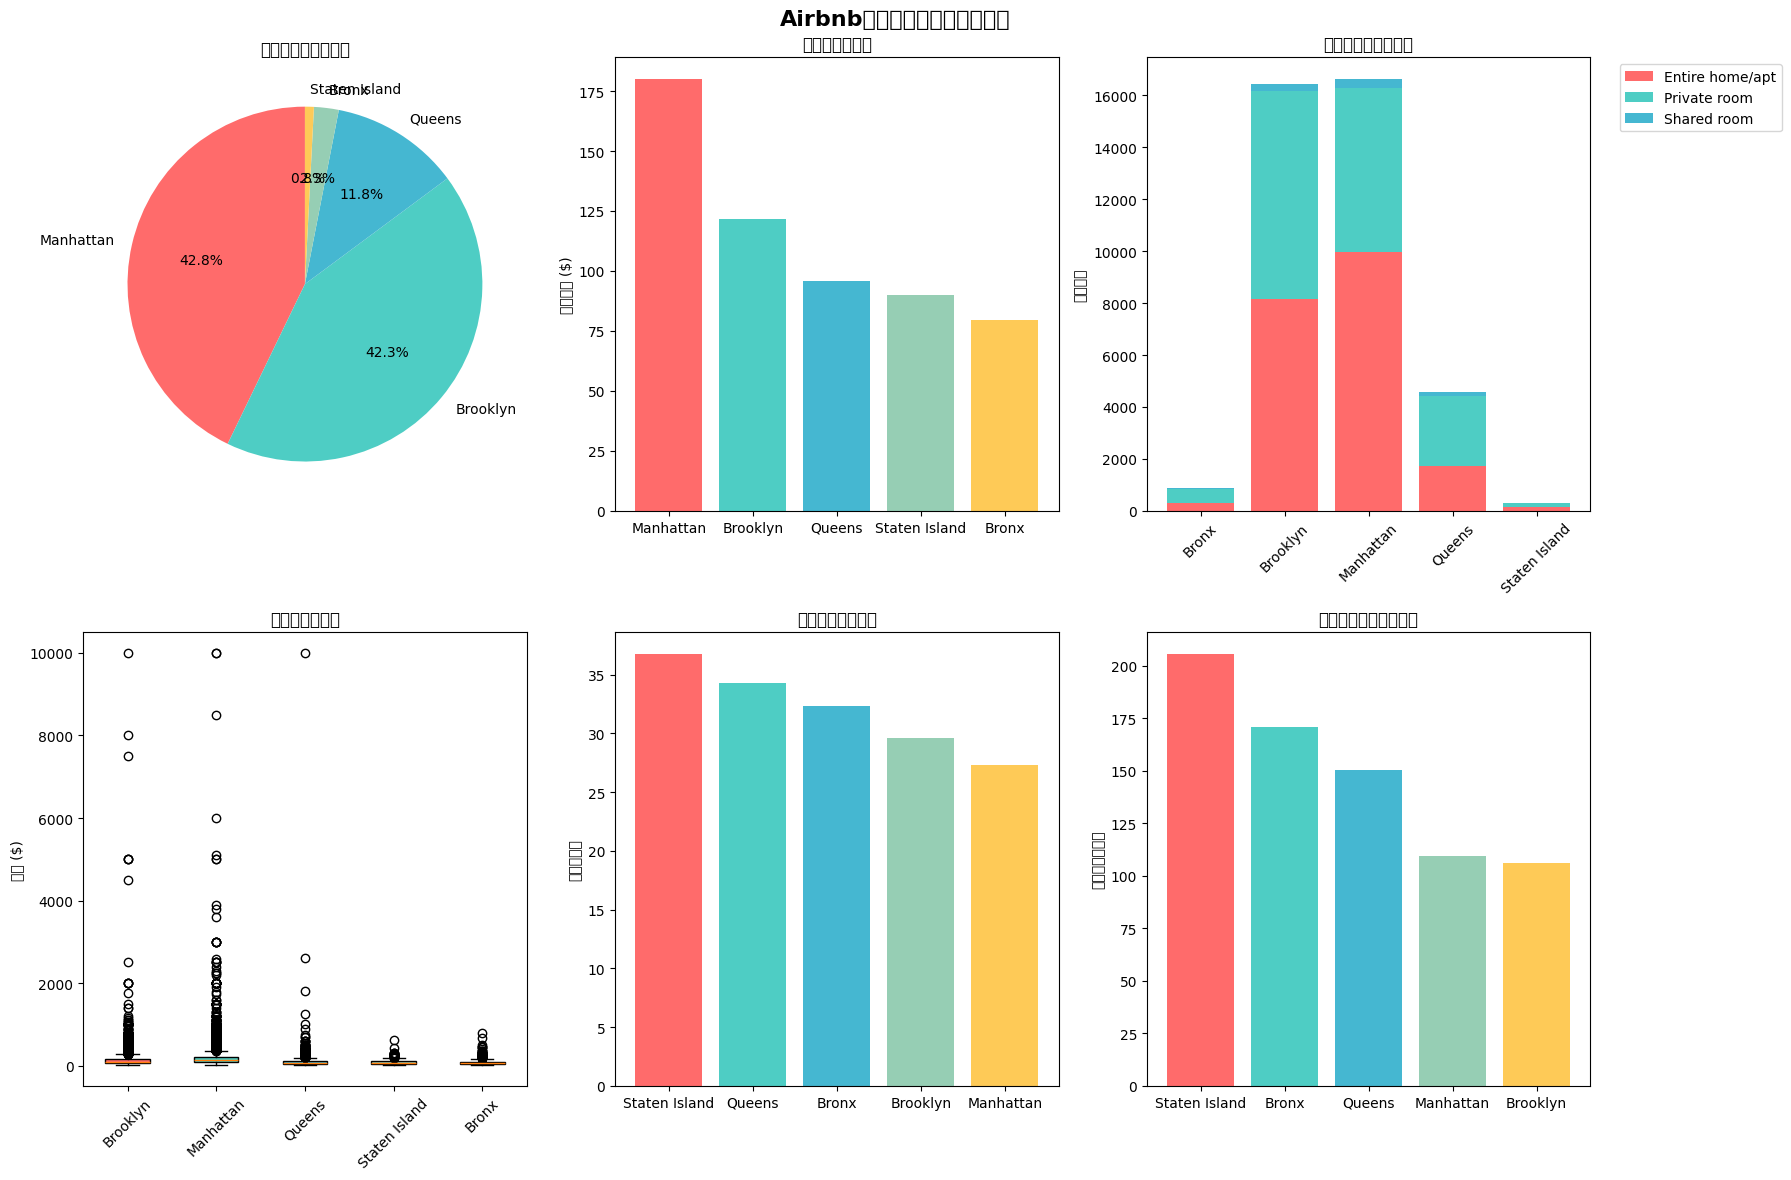

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置样式
plt.style.use('default')

# 1. 创建综合区域分析图表
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Airbnb纽约市房源区域分布分析', fontsize=16, fontweight='bold')

# 子图1: 各地区房源数量饼图
ax1 = axes[0, 0]
neighbourhood_counts = cleaned_data['neighbourhood_group'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
ax1.pie(neighbourhood_counts.values, labels=neighbourhood_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('各地区房源数量分布')

# 子图2: 各地区平均价格柱状图
ax2 = axes[0, 1]
avg_price_by_region = cleaned_data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
x_pos = np.arange(len(avg_price_by_region))
ax2.bar(x_pos, avg_price_by_region.values, color=colors)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(avg_price_by_region.index)
ax2.set_title('各地区平均价格')
ax2.set_ylabel('平均价格 ($)')

# 子图3: 各地区房源类型分布
ax3 = axes[0, 2]
room_type_by_region = pd.crosstab(cleaned_data['neighbourhood_group'], cleaned_data['room_type'])
room_types = room_type_by_region.columns
bottom = np.zeros(len(room_type_by_region))

for i, room_type in enumerate(room_types):
    ax3.bar(room_type_by_region.index, room_type_by_region[room_type], 
            bottom=bottom, label=room_type, color=colors[i % len(colors)])
    bottom += room_type_by_region[room_type]

ax3.set_title('各地区房源类型分布')
ax3.set_ylabel('房源数量')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.sca(ax3)
plt.xticks(rotation=45)

# 子图4: 价格分布箱线图 (手动绘制)
ax4 = axes[1, 0]
regions = cleaned_data['neighbourhood_group'].unique()
box_data = []
for region in regions:
    region_prices = cleaned_data[cleaned_data['neighbourhood_group'] == region]['price']
    box_data.append(region_prices)

box_plot = ax4.boxplot(box_data, labels=regions, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
ax4.set_title('各地区价格分布')
ax4.set_ylabel('价格 ($)')
plt.sca(ax4)
plt.xticks(rotation=45)

# 子图5: 各地区平均评论数
ax5 = axes[1, 1]
avg_reviews_by_region = cleaned_data.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
x_pos = np.arange(len(avg_reviews_by_region))
ax5.bar(x_pos, avg_reviews_by_region.values, color=colors)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(avg_reviews_by_region.index)
ax5.set_title('各地区平均评论数')
ax5.set_ylabel('平均评论数')

# 子图6: 平均可预订天数
ax6 = axes[1, 2]
avg_availability = cleaned_data.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False)
x_pos = np.arange(len(avg_availability))
ax6.bar(x_pos, avg_availability.values, color=colors)
ax6.set_xticks(x_pos)
ax6.set_xticklabels(avg_availability.index)
ax6.set_title('各地区平均可预订天数')
ax6.set_ylabel('平均可预订天数')

plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\3598356208.py:49: UserWarning: Glyph 20215 (\

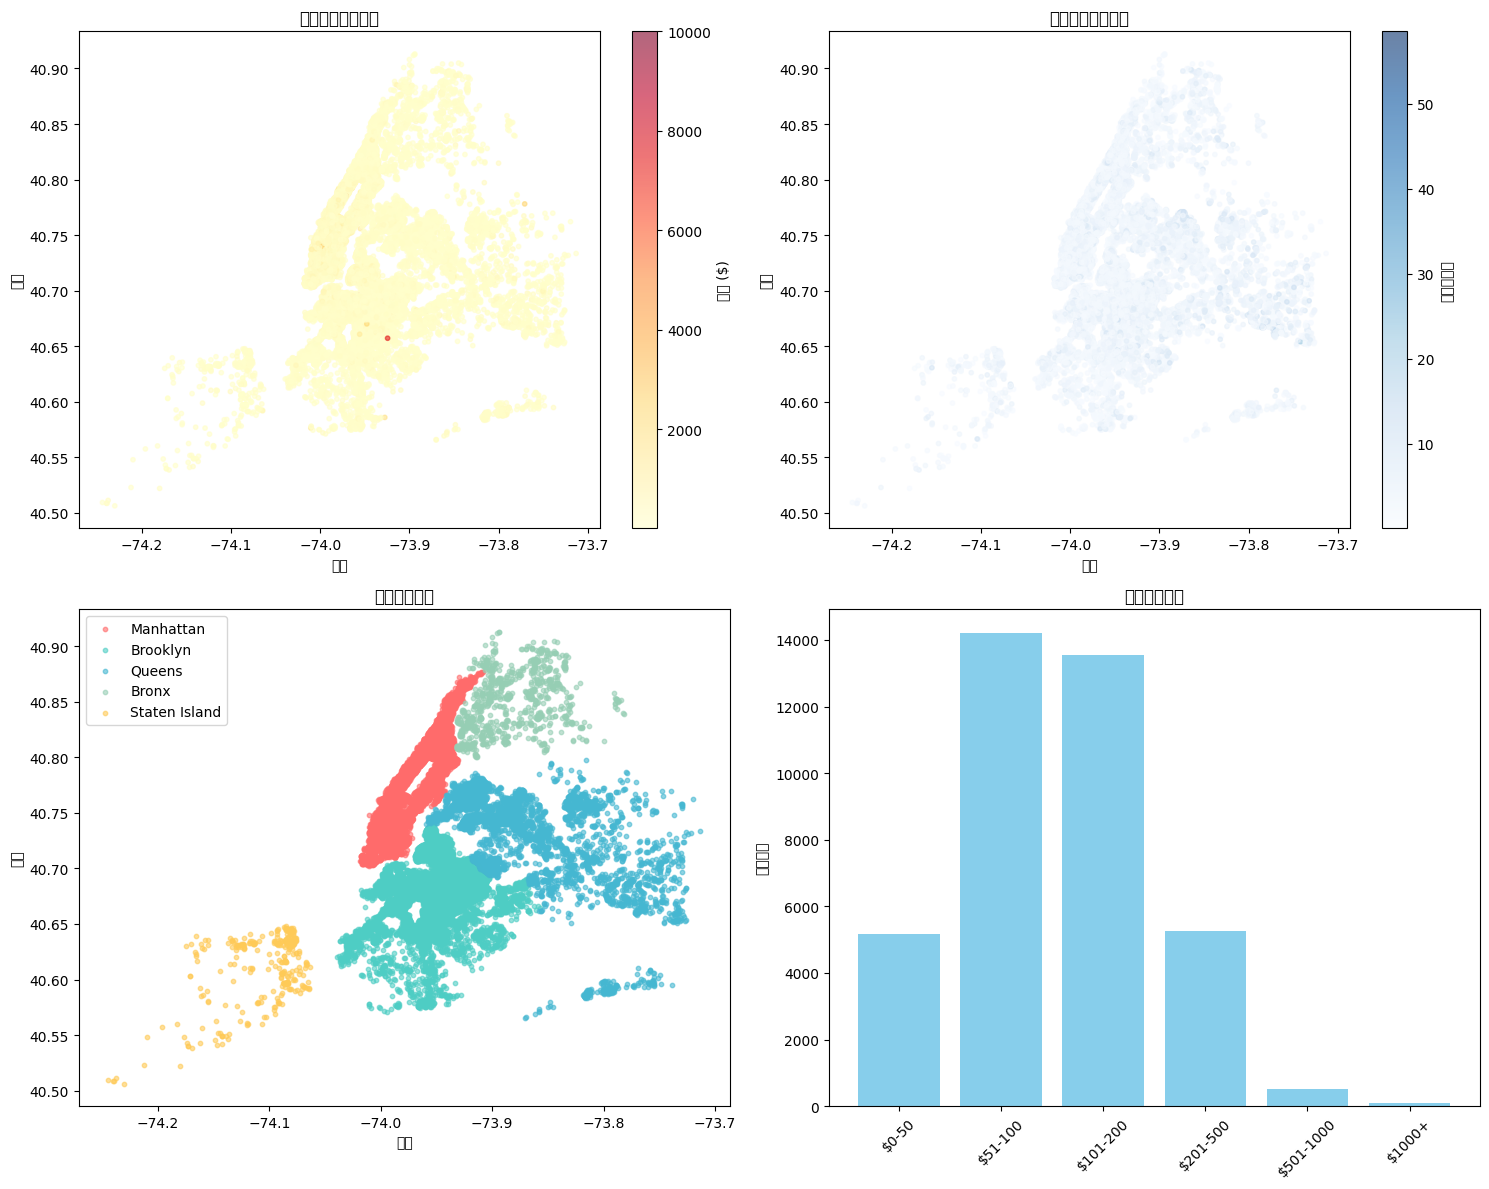

In [32]:
# 2. 地理分布分析
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 子图1: 价格地理分布
ax1 = axes[0, 0]
scatter1 = ax1.scatter(cleaned_data['longitude'], cleaned_data['latitude'], 
                      c=cleaned_data['price'], cmap='YlOrRd', alpha=0.6, s=10)
plt.colorbar(scatter1, ax=ax1, label='价格 ($)')
ax1.set_xlabel('经度')
ax1.set_ylabel('纬度')
ax1.set_title('房源价格地理分布')

# 子图2: 热度地理分布
ax2 = axes[0, 1]
scatter2 = ax2.scatter(cleaned_data['longitude'], cleaned_data['latitude'], 
                      c=cleaned_data['reviews_per_month'], cmap='Blues', alpha=0.6, s=10)
plt.colorbar(scatter2, ax=ax2, label='每月评论数')
ax2.set_xlabel('经度')
ax2.set_ylabel('纬度')
ax2.set_title('房源热度地理分布')

# 子图3: 地区分布
ax3 = axes[1, 0]
region_colors = {'Manhattan': '#FF6B6B', 'Brooklyn': '#4ECDC4', 
                 'Queens': '#45B7D1', 'Bronx': '#96CEB4', 'Staten Island': '#FECA57'}
for region, color in region_colors.items():
    region_data = cleaned_data[cleaned_data['neighbourhood_group'] == region]
    ax3.scatter(region_data['longitude'], region_data['latitude'], 
               c=color, label=region, alpha=0.6, s=10)
ax3.set_xlabel('经度')
ax3.set_ylabel('纬度')
ax3.set_title('房源地区分布')
ax3.legend()

# 子图4: 价格密度分布 (手动实现)
ax4 = axes[1, 1]
# 创建价格密度直方图
price_ranges = [0, 50, 100, 200, 500, 1000, 10000]
price_labels = ['$0-50', '$51-100', '$101-200', '$201-500', '$501-1000', '$1000+']
cleaned_data['price_range'] = pd.cut(cleaned_data['price'], bins=price_ranges, labels=price_labels)
price_dist = cleaned_data['price_range'].value_counts().sort_index()

ax4.bar(range(len(price_dist)), price_dist.values, color='skyblue')
ax4.set_xticks(range(len(price_dist)))
ax4.set_xticklabels(price_dist.index, rotation=45)
ax4.set_title('价格分段分布')
ax4.set_ylabel('房源数量')

plt.tight_layout()
plt.show()

In [33]:
# 3. 生成详细统计表格
print("📊 Airbnb纽约市房源详细统计分析")
print("="*60)

# 按地区分组统计
regional_stats = cleaned_data.groupby('neighbourhood_group').agg({
    'price': ['count', 'mean', 'median', 'std'],
    'number_of_reviews': 'mean',
    'reviews_per_month': 'mean', 
    'availability_365': 'mean',
    'minimum_nights': 'median'
}).round(2)

# 重命名列
regional_stats.columns = ['房源数量', '平均价格', '价格中位数', '价格标准差', 
                         '平均评论数', '月均评论', '平均可订天数', '最少住宿中位数']

print("各地区统计信息:")
print(regional_stats)

print("\n" + "="*60)
print("🏠 房源类型分布:")
room_type_stats = pd.crosstab(cleaned_data['neighbourhood_group'], cleaned_data['room_type'])
print(room_type_stats)

print("\n" + "="*60)
print("💰 价格分段统计:")
price_range_stats = pd.crosstab(cleaned_data['neighbourhood_group'], cleaned_data['price_range'])
print(price_range_stats)

📊 Airbnb纽约市房源详细统计分析
各地区统计信息:
                      房源数量    平均价格  价格中位数   价格标准差  平均评论数  月均评论  平均可订天数  \
neighbourhood_group                                                      
Bronx                  875   79.64   65.0   63.94  32.36  1.84  170.99   
Brooklyn             16438  121.52   94.0  169.87  29.58  1.28  105.86   
Manhattan            16632  180.05  140.0  226.41  27.33  1.27  109.32   
Queens                4574   95.76   72.0  168.36  34.31  1.94  150.51   
Staten Island          314   89.96   75.0   65.86  36.75  1.87  205.64   

                     最少住宿中位数  
neighbourhood_group           
Bronx                    2.0  
Brooklyn                 2.0  
Manhattan                3.0  
Queens                   2.0  
Staten Island            2.0  

🏠 房源类型分布:
room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            309           523           43
Brooklyn                        

C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_19752\1517619558.py:35: UserWarning: Glyph 37327 (\

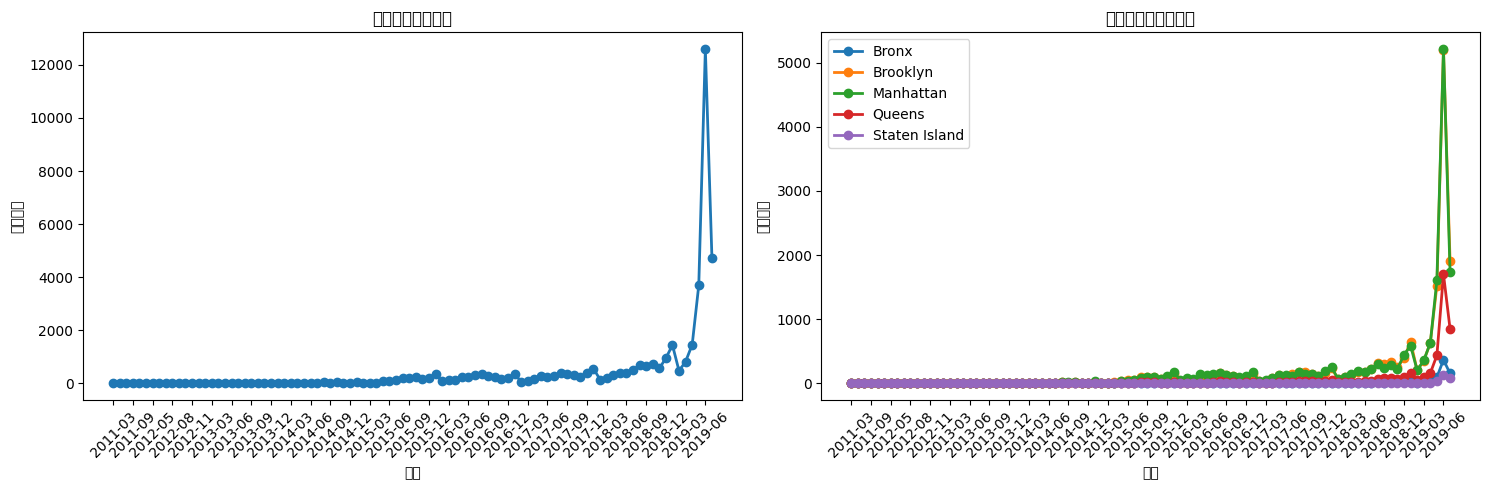

In [34]:
# 4. 时间趋势分析 (如果有时间数据)
if 'last_review' in cleaned_data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # 提取年份月份
    cleaned_data['review_year_month'] = cleaned_data['last_review'].dt.to_period('M')
    monthly_reviews = cleaned_data['review_year_month'].value_counts().sort_index()
    
    # 月度评论趋势
    ax1 = axes[0]
    ax1.plot(range(len(monthly_reviews)), monthly_reviews.values, marker='o', linewidth=2)
    ax1.set_title('月度评论数量趋势')
    ax1.set_ylabel('评论数量')
    ax1.set_xlabel('时间')
    
    # 每隔3个月显示一个标签以避免重叠
    tick_positions = range(0, len(monthly_reviews), 3)
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels([str(monthly_reviews.index[i]) for i in tick_positions], rotation=45)
    
    # 各地区评论时间分布
    ax2 = axes[1]
    region_monthly = cleaned_data.groupby(['neighbourhood_group', 'review_year_month']).size().unstack(fill_value=0)
    for region in region_monthly.index:
        ax2.plot(range(len(region_monthly.columns)), region_monthly.loc[region].values, 
                label=region, marker='o', linewidth=2)
    
    ax2.set_title('各地区月度评论趋势')
    ax2.set_ylabel('评论数量')
    ax2.set_xlabel('时间')
    ax2.legend()
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([str(region_monthly.columns[i]) for i in tick_positions], rotation=45)
    
    plt.tight_layout()
    plt.show()